# Shijali Khare

# Task 3: Exploratory Data Analysis :Retail(Beginner)

## Task:
    Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’
    As a business manager, try to find out the weak areas where you can
    work to make more profit.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# now we will load the data
data=pd.read_csv('Desktop/SampleSuperstore.csv')

In [3]:
data.head()
# to see the top 5 enteries of data.

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
# firstly checking the missing values
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [5]:
# hence we see there are no missing values in our data.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


###  OBSERVATION : From this we see some useful information linke min sales=1040 , max sales=99301 , min profit =-6599 ,max profit=8399 and much more

In [8]:
# now lets see the total sales and total profit 
print('Total Sales are {} and Total profit is {}'.format(data['Sales'].sum(),data['Profit'].sum()))

Total Sales are 2297200.8603000003 and Total profit is 286397.0217


### OBSERVATION
total sales of company is 2297200 and total profit is 286397

## Country


In [9]:
# now lets see how many countries are there
data['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

###  OBSERVATION: since there is only a single country therefore there is no need for this column and also postal code and hence we will drop this from our dataset

In [10]:
data=data.drop(['Country','Postal Code'],axis=1)

In [11]:
data.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


<AxesSubplot:>

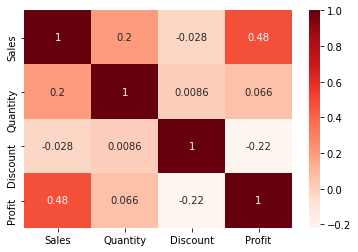

In [12]:
sns.heatmap(data.corr(),annot = True, cmap = 'Reds')

In [13]:
# From this heatmap we see the correlation betwwen all features with each other.

In [14]:
# now lets take every feature and analyse it seperately and find some good observations and solutions for problems.


## Costumers

In [15]:
data['Segment'].unique().sum()

'ConsumerCorporateHome Office'

In [16]:
# here we see there are 3 categories in our data ie Consumer ,Corporate Home , Office

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Segment'>

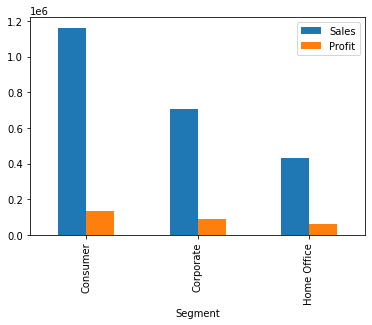

In [17]:
data.groupby('Segment')['Sales','Profit'].sum().plot.bar()

## Observation: 
1. Consumer are having maximum sales as well as profit followed by Corporate and Home office
2. In all the three categories the sales and profit are directly related

<AxesSubplot:xlabel='Segment', ylabel='count'>

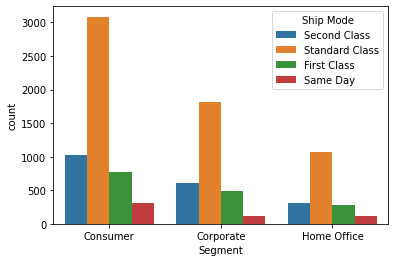

In [18]:
# Now lets see the relation between the segment and ship mode
sns.countplot(x='Segment',hue='Ship Mode',data=data)

## OBSERVATION:

Here we see that most of the transactions are done using Standard Class for all of the segment categories.

## REGION

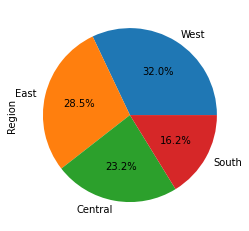

In [19]:
data['Region'].value_counts().plot.pie(autopct='%.1f%%')
plt.show()

## OBSERVATION :
    
West region has the maximum transaction and least by South region        

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Region'>

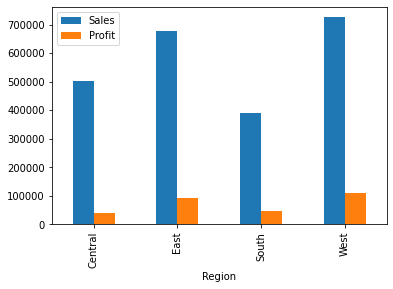

In [20]:
data.groupby('Region')['Sales','Profit'].sum().plot.bar()

## Observation:
        
1. West region having maximum sales as well as maximum profit.
2. While South has least sales and least profit and same for others.

# PRODUCTS

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


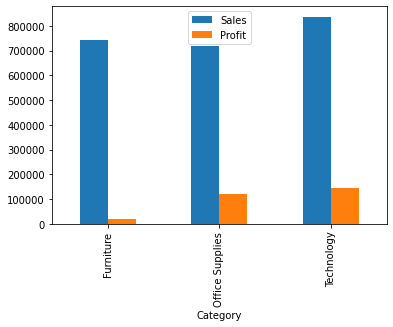

In [22]:
data.groupby('Category')['Sales','Profit'].sum().plot.bar()
plt.show()

## OBSERVATION:
1. Technology category has the highest sales as well as highest profit 
2. Furniture category is having least profit despite having more sales than office supplies.

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


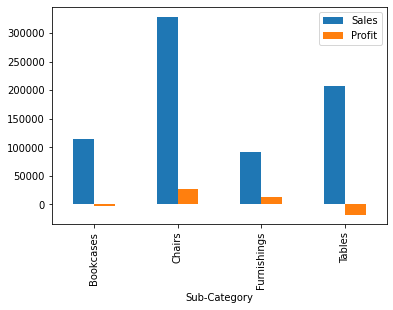

In [28]:
data[data['Category']=='Furniture'].groupby('Sub-Category')['Sales','Profit'].sum().plot.bar()
plt.show()


###here we are trying to see the sales and profit in subcategory where category is furniture and trying to find the reason for loss in furniture

## OBSERVATION

1.Chairs are having maximum sales and maximum profit

2.Book cases and tables are facing loss which is affecting the whole category furniture.

In [29]:
## now lets see why are these two subcategories facing loss by comparing them with discount

<AxesSubplot:xlabel='Sub-Category'>

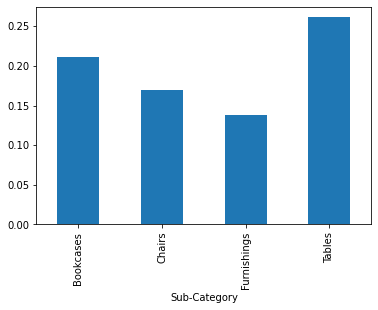

In [32]:
data[data['Category']=='Furniture'].groupby('Sub-Category')['Discount'].mean().plot.bar()

## OBSERVATION
here we see that Bookcases and Tables are having maximum discount ie more than 20% 

<AxesSubplot:>

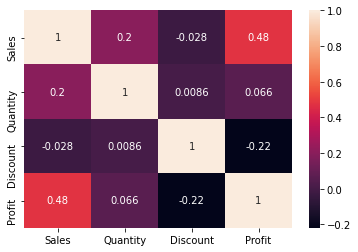

In [33]:
sns.heatmap(data.corr(),annot=True)

## OBSERVATION
In heatmap the correlation between Discount and sales is negative 
And also the coorelation between profit and discount is negative

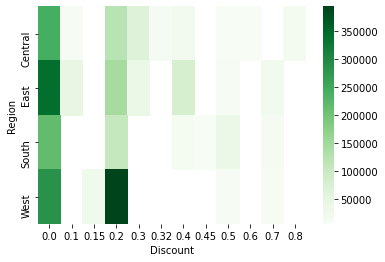

In [35]:
sales_coz_discount = pd.pivot_table(data = data, index = 'Region', columns = 'Discount', values = 'Sales', aggfunc = 'sum')
sns.heatmap(sales_coz_discount, cmap = 'Greens')
plt.show()

## OBSERVATION
Its clearly visible that after an discount of 20% there is not much sales 
So we found that tables and bookcases are having an discount of 20% and more but the sales are not going high after 20% discount
this is the reason of loss in furniture category
        

# SOLUTION
We should decrease the average discount of the tables and bookcases from 20% to increase sales 

## City and State

In [49]:
# Now lets analyse state and city
data['State'].value_counts().count()

49

In [50]:
data['City'].value_counts().count()

531

### OBSERVATION
the company sells its products in 49 states and 531 cities

## Top Products

Text(0, 0.5, 'Sales')

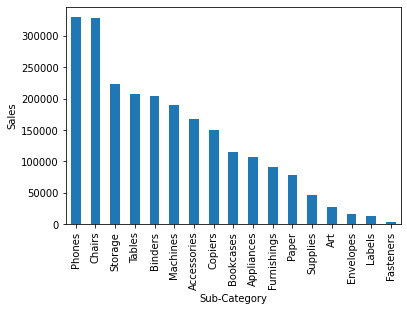

In [57]:
data.groupby('Sub-Category')['Sales'].sum().sort_values(ascending =False).plot.bar()
plt.ylabel('Sales')

### OBSERVATION
we see that phones and chairs are having maximum sales

Text(0, 0.5, 'Profit')

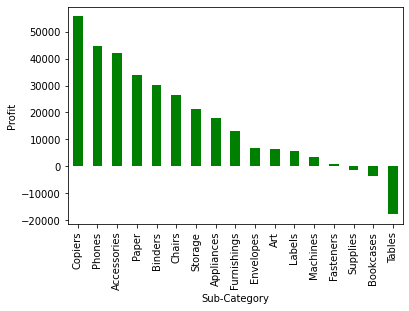

In [56]:
data.groupby('Sub-Category')['Profit'].sum().sort_values(ascending =False).plot.bar(color='g')
plt.ylabel('Profit')

### OBSERVATION
We see that Bookcases and Tables are having loss among all

Text(0, 0.5, 'Discount')

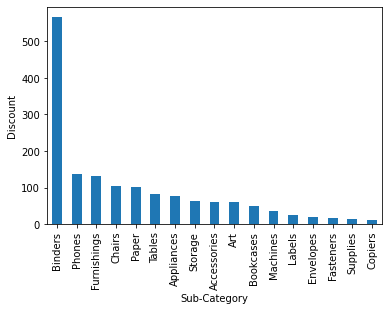

In [55]:
data.groupby('Sub-Category')['Discount'].sum().sort_values(ascending =False).plot.bar()
plt.ylabel('Discount')

### OBSERVATION
Blinders have got the most discount of all items.

## Quantity

Now lets see top 5 performing and least 5 performing products on basis of quantity

In [65]:
print("TOP 5 PERFORMING PRODUCTS ")
print(data.groupby('Sub-Category')['Quantity'].sum().sort_values(ascending=False).head())



TOP 5 PERFORMING PRODUCTS 
Sub-Category
Binders        5974
Paper          5178
Furnishings    3563
Phones         3289
Storage        3158
Name: Quantity, dtype: int64


In [66]:
print(" LEAST 5 PERFORMING PRODUCTS")
print(data.groupby('Sub-Category')['Quantity'].sum().sort_values(ascending=False).tail())

 LEAST 5 PERFORMING PRODUCTS
Sub-Category
Envelopes    906
Bookcases    868
Supplies     647
Machines     440
Copiers      234
Name: Quantity, dtype: int64


## ALL OBSERVATIONS
1. min sales=1040 , max sales=99301 , min profit =-6599 ,max profit=8399
2.total sales of company is 2297200 and total profit is 286397
3.since there is only a single country therefore there is no need for this column
and also postal code and hence we will drop this from our dataset
4.Consumer are having maximum sales as well as profit followed by Corporate and Home office
5.In all the three categories the sales and profit are directly related
6.Most of the transactions are done using Standard Class for all of the segment categories.
7.West region has the maximum transaction and least by South region
8.West region having maximum sales as well as maximum profit.
9.While South has least sales and least profit and same for others.
10.Chairs are having maximum sales and maximum profit
11.Book cases and tables are facing loss which is affecting the whole category furniture.
12.Bookcases and Tables are having maximum discount ie more than 20%
13.n heatmap the correlation between Discount and sales is negative And also the coorelation between profit 
discount is negative
14.Its clearly visible that after an discount of 20% there is not much sales So we found that tables and bookcases 
are having an discount of 20% and more but the sles are 
not going high after 20% discount this is the reason of loss in furniture category
15.the company sells its products in 49 states and 531 cities
16.we see that phones and chairs are having maximum sales
17.Blinders have got the most discount of all items.


## CONCLUSION
We can increase the profits of furniture category by decreasing the average discounts given
to the tables and bookcases under 20%.